In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append('/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/stuff/')
from stuff import *
import detect_peaks

Fitting class


In [2]:
import scipy as sp
from scipy.interpolate import interp1d
from scipy import signal
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from pylab import *
import os
%config InlineBackend.figure_format = 'retina'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
import pandas as pd

# Task 1

In [4]:
I = [0.0, 
     0.2, 
     0.4, 
     0.6, 
     0.8, 
     0.9
    ]
N = [0.2, 
     0.23, 
     0.18, 
     0.20, 
     0.38, 
     0.87
    ]

In [5]:
I = [0.0, 
     0.1, 
     0.2, 
     0.4, 
     0.6, 
     0.8,
     1.0
    ]
N = [0.2, 
     0.33, 
     0.32, 
     0.42, 
     0.55, 
     0.90,
     1.13
    ]

In [6]:
I_N = pd.DataFrame(N, I)

## a

In [7]:
# plt.style.use('dark_background')

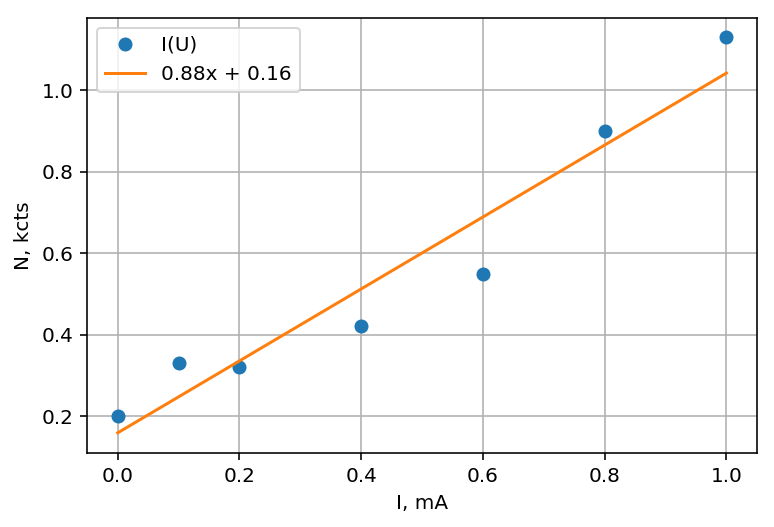

In [8]:
I_N.plot(style='o')
z = polyfit(I, N, 1)

plt.plot(z[1] + z[0]*np.linspace(0,1, 2))
plt.xlabel('I, mA')
plt.ylabel('N, kcts')
plt.grid()
plt.legend(['I(U)',f'{round(z[0], 2)}x + {round(z[1], 2)}'])
plt.savefig('N(I)', dpi=300)

The countrate is directly proportional to the emission current as the increase of current leads to higher temperature of the emitting coil.
Temperature of the coil is proportional to the square of the current.
The number of emitted electrons (hence X-rays) depends exponentially on temperature due to Boltzmann law.
Thus, the observed linear dependence is apparently an approximation of the exponent on the small range of temperatures of the coil.

___

In [9]:
U = [
     10, 
     12, 
     15, 
     17, 
     20,
     25,
     30,
     32,
     33,
     35
    ]
N = [ 
     0.13, 
     0.15, 
     0.22, 
     0.27, 
     0.22,
     0.27,
     0.45,
     1.0,
     1.6,
     3.92
    ]

In [10]:
def funcExp(x, *p):
    A=p[0]
    B=p[1]
    return A*np.exp(x*B)

In [11]:
U_N = pd.DataFrame(N, U)

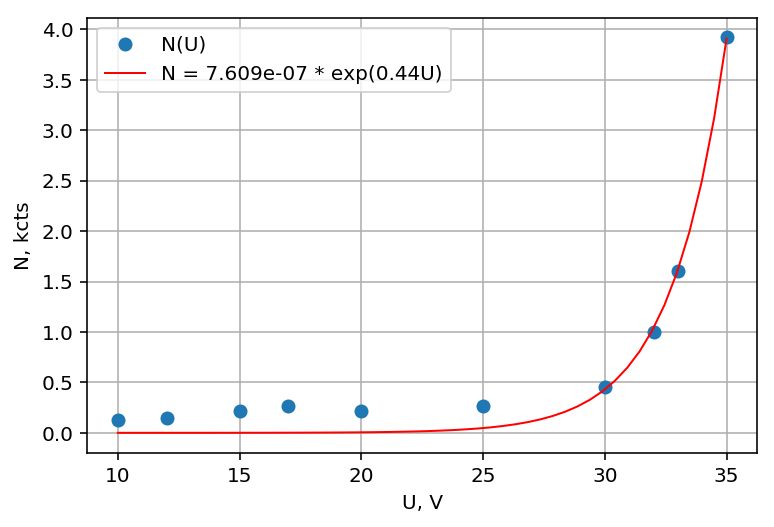

In [12]:
U_N.plot(style='o')
# zUn = polyfit(U, N, 1)
plt.xlabel('U, V')
plt.ylabel('N, kcts')
plt.grid()

guess = [1, 1]
# bounds=([-1e3,-1e3], [1e8, 1e8])
popt, pcov = curve_fit(funcExp, U, N, p0=guess)#, bounds=bounds)
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])

fit = funcExp(np.linspace(10,35,50), *popt)
plt.plot(np.linspace(10,35,50), fit , 'r-', linewidth = 1)

plt.legend([r'N(U)', f'N = {round(popt[0],10)} * exp({round(popt[1],2)}U)'])
plt.savefig('n(u)', dpi=300)

Kinetic energy of the emitted electrons depends linearly on the applied voltage

## Relaxation of the detector

In [13]:
I

[0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

In [14]:
I1 = np.arange(0.0, 0.1, 0.01)
N1 = np.array([0.31, 569.5, 1060, 1442, 1747, 2106, 2391, 2609, 2866, 3104])

In [15]:
I2 = np.arange(0.1, 0.2, 0.02)
N2 = np.array([3294, 3698, 4123, 4515,4935])

In [16]:
I3 = np.arange(0.2, 1.1, 0.1)
N3 = np.array([5361, 6905, 7417, 7290, 6945, 6543, 6119, 5758, 5455])

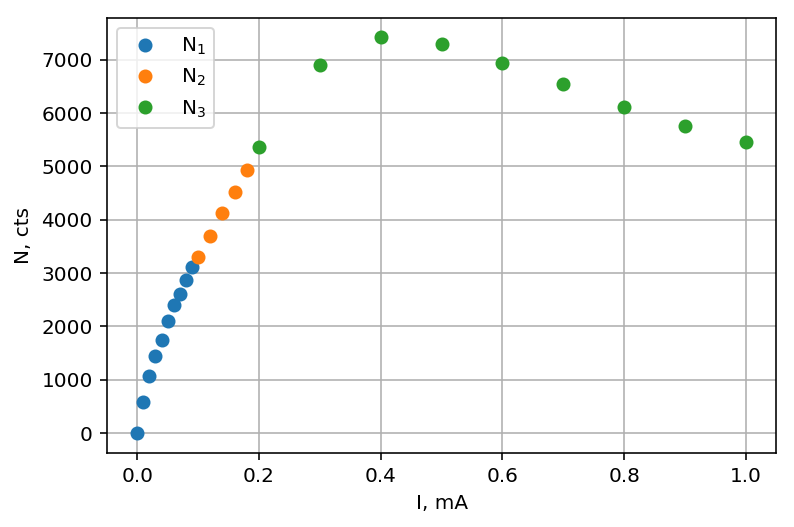

In [17]:
plt.plot(I1, N1, 'o')
plt.plot(I2, N2, 'o')
plt.plot(I3, N3, 'o')
plt.xlabel('I, mA')
plt.ylabel('N, cts')
plt.grid()

# zUn = polyfit(U, N, 1)
plt.legend([r'N$_1$', r'N$_2$', r'N$_3$'])
plt.savefig('deadTime', dpi=300)

the dead time of the geiger tube 
as it can be seen the countrate saturates at 7000 and then drops. What means, that the detector 

## P2 

In [18]:
np.arcsin(71.0*1e-12/(4.02*1e-10))

0.17754826669684406

-----

## Task 2

## LiF

In [19]:
beta = '-5.0 -4.8 -4.6 -4.4 -4.2 -4.0 -3.8 -3.6 -3.4 -3.2 -3.0 -2.8 -2.6 -2.4 -2.2 -2.0 -1.8 -1.6 -1.4 -1.2 -1.0 -0.8 -0.6 -0.4 -0.2 0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.2 2.4 2.6 2.8 3.0 3.2 3.4 3.6 3.8 4.0 4.2 4.4 4.6 4.8 5.0 5.2 5.4 5.6 5.8 6.0 6.2 6.4 6.6 6.8 7.0 7.2 7.4 7.6 7.8 8.0 8.2 8.4 8.6 8.8 9.0 9.2 9.4 9.6 9.8 10.0 10.2 10.4 10.6 10.8 11.0 11.2 11.4 11.6 11.8 12.0 12.2 12.4 12.6 12.8 13.0 13.2 13.4 13.6 13.8 14.0 14.2 14.4 14.6 14.8 15.0 15.2 15.4 15.6 15.8 16.0 16.2 16.4 16.6 16.8 17.0 17.2 17.4 17.6 17.8 18.0 18.2 18.4 18.6 18.8 19.0 19.2 19.4 19.6 19.8 20.0 20.2 20.4 20.6 20.8 21.0 21.2 21.4 21.6 21.8 22.0 22.2 22.4 22.6 22.8 23.0 23.2 23.4 23.6 23.8 24.0 24.2 24.4 24.6 24.8 25.0 25.2 25.4 25.6 25.8 26.0 26.2 26.4 26.6 26.8 27.0 27.2 27.4 27.6 27.8 28.0 28.2 28.4 28.6 28.8 29.0 29.2 29.4 29.6 29.8 30.0 30.2 30.4 30.6 30.8 31.0 31.2 31.4 31.6 31.8 32.0 32.2 32.4 32.6 32.8 33.0 33.2 33.4 33.6 33.8 34.0'
betaLiF = list(map(lambda x: float(x),beta.split(' ')))

In [20]:
R1 = '364.5 456.0 524.5 554.5 565.0 640.0 647.5 642.5 677.0 640.5 625.0 631.5 609.0 615.5 590.5 581.5 547.5 597.5 833.5 1317.0 831.0 549.5 534.0 606.5 1982.0 2724.0 827.0 429.0 433.5 385.0 387.5 361.5 362.0 349.0 354.0 336.5 286.5 277.0 288.5 272.5 261.0 221.5 202.0 202.0 212.0 211.5 191.0 175.0 175.5 159.0 169.5 152.5 161.5 142.0 132.0 141.0 135.5 143.0 128.5 125.5 130.0 137.0 123.0 126.5 162.5 243.0 186.0 121.5 113.0 108.5 120.0 113.5 116.0 117.0 105.5 118.0 211.5 523.0 338.0 113.5 100.0 102.0 109.0 90.5 95.5 81.0 87.5 87.0 87.5 79.5 81.0 83.0 84.5 80.0 82.5 74.0 86.5 75.0 81.0 76.5 68.5 70.0 80.0 60.5 65.5 68.0 64.0 55.0 69.0 57.5 64.5 64.0 67.5 65.0 82.0 73.0 61.0 62.0 55.0 49.0 64.0 52.5 60.5 54.5 57.5 56.0 53.0 52.5 45.5 48.0 48.5 48.0 72.5 116.5 103.5 70.5 51.5 43.5 48.5 47.5 49.0 42.5 38.0 36.5 44.5 47.5 40.0 58.0 43.5 44.0 41.5 44.5 43.5 43.5 45.5 38.0 33.5 42.0 50.5 36.0 39.0 45.0 37.5 32.5 40.0 41.5 42.0 40.5 40.5 39.0 38.5 40.5 41.0 39.0 33.5 42.0 34.0 42.0 33.5 29.5 35.5 30.0 29.0 33.5 28.0 38.5 35.5 29.0 38.5 24.0 37.0 36.5 32.0 33.5 38.0 38.5'
RLiF = list(map(lambda x: float(x), R1.split(' ')))

In [21]:
# plt.plot(betaLiF, RLiF)
# plt.title('LiF')

## NaCl

In [22]:
beta = '-5.0 -4.8 -4.6 -4.4 -4.2 -4.0 -3.8 -3.6 -3.4 -3.2 -3.0 -2.8 -2.6 -2.4 -2.2 -2.0 -1.8 -1.6 -1.4 -1.2 -1.0 -0.8 -0.6 -0.4 -0.2 0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.2 2.4 2.6 2.8 3.0 3.2 3.4 3.6 3.8 4.0 4.2 4.4 4.6 4.8 5.0 5.2 5.4 5.6 5.8 6.0 6.2 6.4 6.6 6.8 7.0 7.2 7.4 7.6 7.8 8.0 8.2 8.4 8.6 8.8 9.0 9.2 9.4 9.6 9.8 10.0 10.2 10.4 10.6 10.8 11.0 11.2 11.4 11.6 11.8 12.0 12.2 12.4 12.6 12.8 13.0 13.2 13.4 13.6 13.8 14.0 14.2 14.4 14.6 14.8 15.0 15.2 15.4 15.6 15.8 16.0 16.2 16.4 16.6 16.8 17.0 17.2 17.4 17.6 17.8 18.0 18.2 18.4 18.6 18.8 19.0 19.2 19.4 19.6 19.8 20.0 20.2 20.4 20.6 20.8 21.0 21.2 21.4 21.6 21.8 22.0 22.2 22.4 22.6 22.8 23.0 23.2 23.4 23.6 23.8 24.0'
betaNaCl = list(map(lambda x: float(x),beta.split(' ')))

In [23]:
R1 = '132.0 112.5 105.0 97.5 101.5 161.0 173.0 160.0 117.5 299.5 386.5 353.5 189.0 180.5 195.5 187.5 186.0 168.0 179.5 156.0 157.5 149.0 139.5 114.5 113.0 114.0 110.0 101.5 85.0 104.0 112.5 87.5 94.5 102.5 85.0 95.0 93.0 94.0 102.0 98.0 116.0 101.0 97.0 112.5 106.0 92.5 127.5 125.0 101.5 89.5 81.5 81.5 79.5 78.0 78.5 64.0 73.0 67.0 61.0 54.0 61.5 56.5 42.5 51.0 53.0 48.0 45.0 43.5 45.0 43.0 47.0 38.0 54.0 48.0 49.5 35.0 35.5 34.5 30.5 32.5 29.5 29.0 39.0 34.0 34.5 45.5 34.0 36.0 31.5 31.5 29.0 31.5 25.5 26.0 24.0 27.0 26.5 21.0 22.5 26.0 19.0 21.0 22.0 21.5 17.5 21.0 23.5 16.5 15.0 19.0 16.5 17.5 14.5 15.0 13.5 20.5 15.5 17.5 15.5 18.0 13.0 13.5 20.0 23.0 17.5 19.0 13.5 17.0 14.0 17.0 15.0 15.5 17.0 13.0 12.0 11.0 12.0 11.5 11.5 12.0 9.0 12.5 13.5 10.5 15.5 12.0' 
RNaCl = list(map(lambda x: float(x), R1.split(' ')))

In [24]:
# plt.plot(betaNaCl, RNaCl)
# plt.title('NaCl')

In [25]:
newR = np.roll(5*np.array(RNaCl), 15 + 36)

In [26]:
peaks = detect_peaks.detect_peaks(newR,mph=1000, mpd=1)

In [27]:
newR2 = np.roll(np.array(RLiF), 15 + 36)

In [28]:
peaks = detect_peaks.detect_peaks(newR2,mph=1000, mpd=1)

In [29]:
a=45
b=150

In [30]:
la = 71.08*1e-12
lb = 63.09*1e-12

## NaCl

$\beta$ -- $\lambda = 63.09*10^{-12}$

6.3 - NaCl

In [71]:
d = lb/(2*np.sin((6.4/180)*np.pi))

In [72]:
2*d*1e12

565.987300239159

In [73]:
d = la/(2*np.sin((7.2/180)*np.pi))

In [74]:
565.98

565.98

In [75]:
2*d*1e12

567.1281110251675

## LiF 

$\alpha$ -- $\lambda = 71.08*10^{-12}$

In [89]:
401.38975200077965 - 405.3220447459092

-3.93229274512953

In [130]:
np.cos(np.pi*0.1/(180))

0.9999984769132877

In [143]:
dd = lambda O: np.pi*0.05/(180)*l*(np.cos(np.pi*O/(180))/(np.sin(np.pi*O/(180)))**2)

In [144]:
l = 1e12*la
list(map(dd, [6.4, 9.0]))


[4.961032612301137, 2.503512910695958]

In [145]:
l = 1e12*lb
list(map(dd, [7.2, 10.2]))

[3.4772610465687586, 1.727933577863994]

In [134]:
dd(9.1, la*1e12)

4.8971260650174075

In [82]:
d = lb/(2*np.sin((9.1/180)*np.pi))

In [83]:
2*d*1e12 

398.9047229471091

In [90]:
d = la/(2*np.sin((9.9/180)*np.pi))

In [91]:
2*d*1e12 

413.4262314203051

In [40]:
def funcLorenz(w, *params):
    y = np.zeros_like(w)
    for i in range(0, len(params), 4):
        dw = params[i]
        b = params[i+1]
        w_0 = params[i+2]
        a = params[i+3]
        y = y + a + b*dw/((w - w_0)**2 + dw**2/4)
    return y

In [50]:
# %matplotlib qt

In [51]:
a=45
b=150

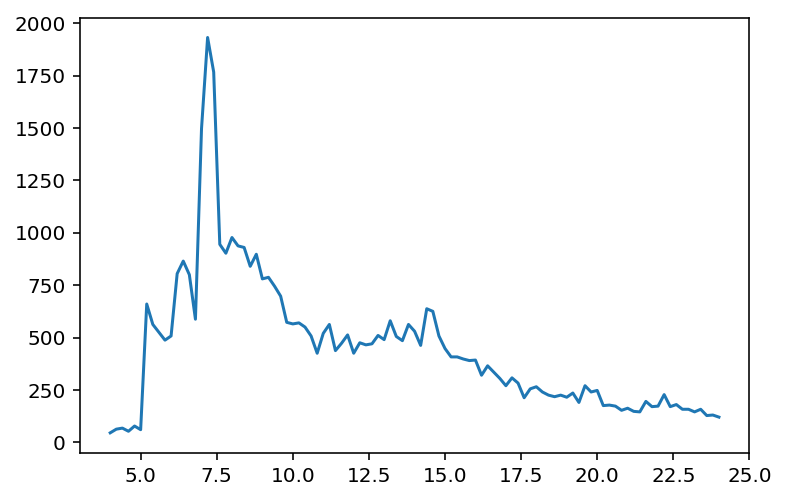

In [52]:
# plt.style.use('dark_background')
plt.plot(betaNaCl[a:b], newR[a:b])

In [53]:
%matplotlib inline

In [54]:
# a=58
# b=64

In [55]:
import plotter

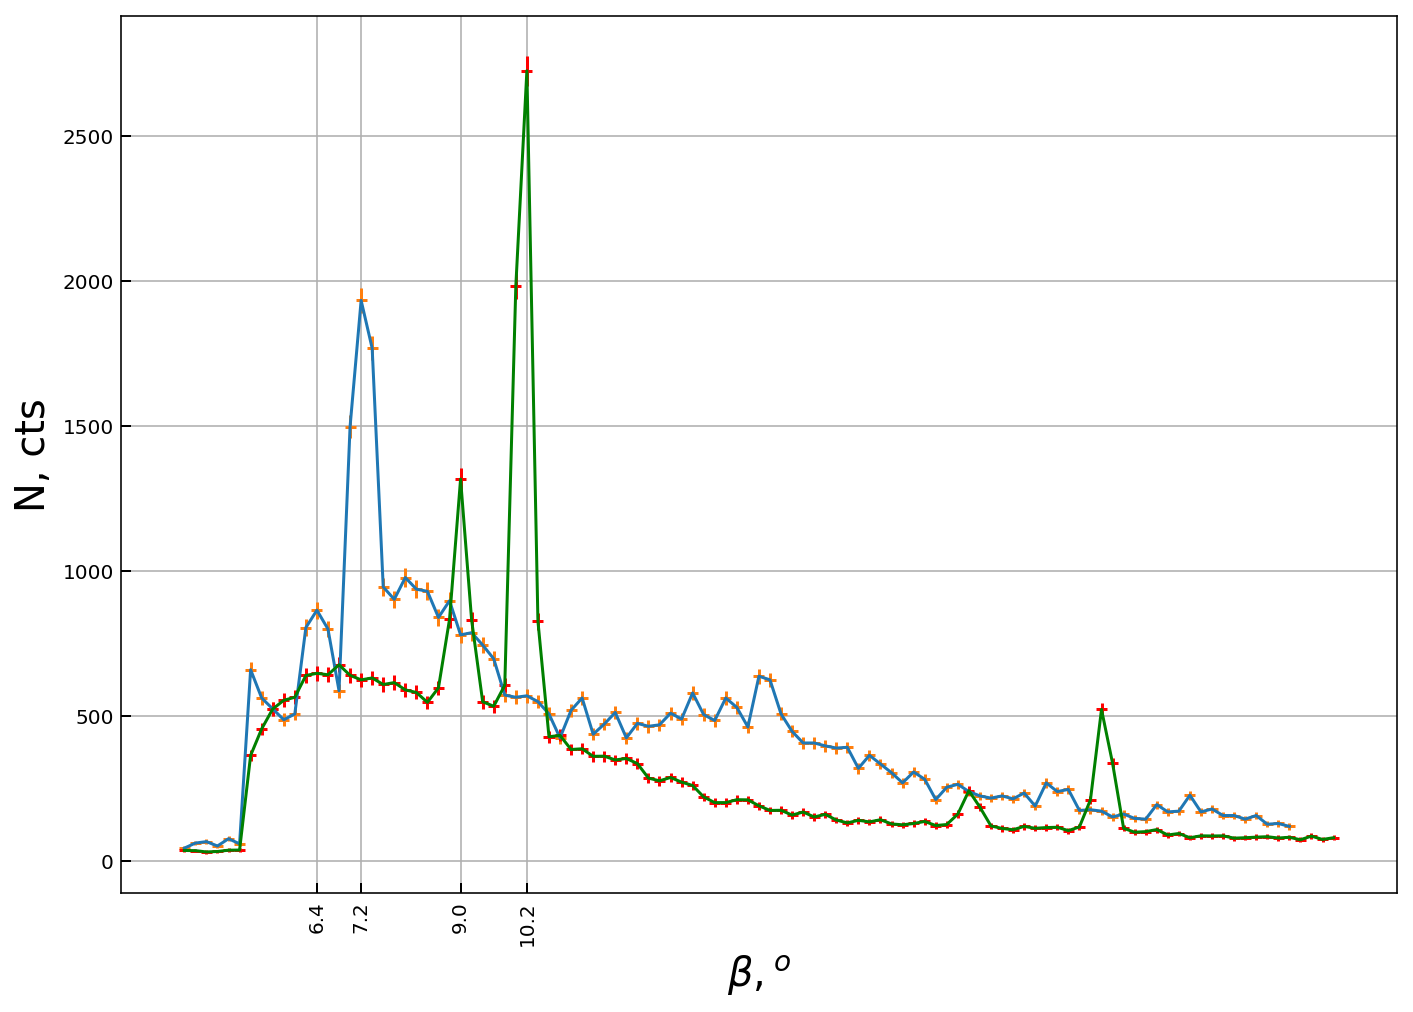

In [79]:
ax, fig = plotter.simplePlot(betaNaCl[a:b], newR[a:b], 
                             xLabel=r'$\beta, ^o$', 
                             yLabel='N, cts',
                             symbol='-', 
                             errorX=0.1, 
                             errorY=np.sqrt(newR[a:b]),figsize=(10,7))
# fig.xaxis.set_ticklabels(font=15)
plt.errorbar(betaLiF[a:b], newR2[a:b], yerr=np.sqrt(newR2[a:b]), xerr=0.1,ecolor='r', fmt='-g')
# plt.title('both')
# guess=[]

# guess = [3, 4, 7.3, 1000]
# print(guess)
# popt, pcov = curve_fit(funcLorenz, betaNaCl[a:b], newR[a:b], p0=guess)
# perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
# print ("OPTIMIZED PARAMETERS: cureveN [dw, b, w_0, a]", popt, 'errer', perr)
# x_play = np.linspace(0,30, 100)
# fit = funcLorenz(x_play, *popt)
# plt.plot(x_play, fit, 'r-', linewidth = 1)


# plt.plot(6.4, 7.3, newR[], 'o')
plt.xticks([6.4, 7.2, 9.0, 10.2], rotation=90)
# plt.plot(np.array(betaNaCl)[peaks],newR2[peaks], 'o')
# plt.xticks(np.array(betaNaCl)[peaks])
# plt.tight_layout()
plt.savefig('latticeConst.png', dpi=300)

In [57]:
np.sqrt(2000)

44.721359549995796

Text(0,0.5,'N, cts')

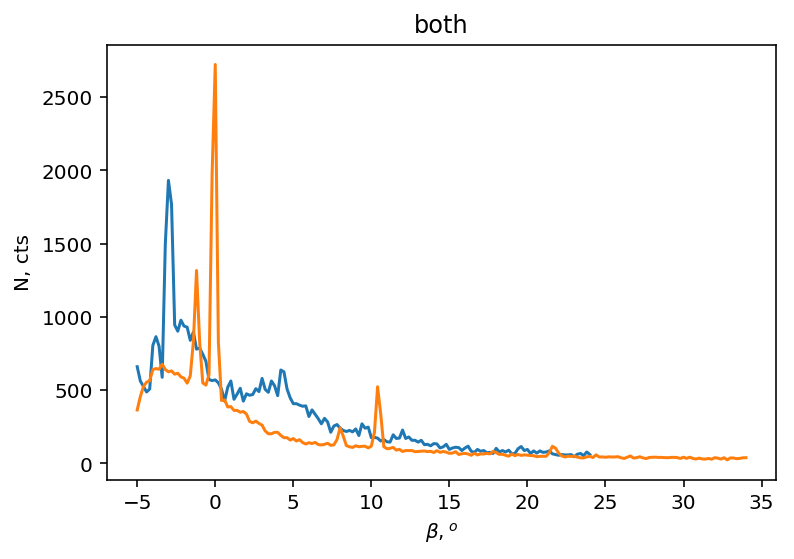

In [49]:
plt.plot(betaNaCl, 5*np.array(RNaCl))
plt.plot(betaLiF, RLiF)
plt.title('both')
plt.xlabel(r'$\beta, ^o$')
plt.ylabel('N, cts')




## Task 3

In [146]:
beta = []
R1 = []
R2 = []
R3 = []
R4 = []
R5 = []
R6 = []

In [147]:
def app(beta1):
    beta1 = list(map(lambda x: float(x),beta1.split(' ')))
    beta.append(beta1[0])
    R1.append(beta1[1])
    R2.append(beta1[2])
    R3.append(beta1[3])
    R4.append(beta1[4])
    R5.append(beta1[5])
    R6.append(beta1[6])

In [148]:
beta1 = '5.2 9.5 15.0 26.5 32.0 48.5 55.5 62.5'
app(beta1)

beta2 = '5.3 8.5 12.5 24.5 27.0 46.0 46.5 63.5'
app(beta2)

beta3 = '5.4 3.5 14.5 24.5 30.5 43.0 44.5 71.5'
app(beta3)

beta4 = '5.5 6.5 12.0 23.5 32.0 41.0 44.0 59.5'
app(beta4)

beta5 = '5.6 5.0 16.5 32.0 31.0 25.0 50.5 64.0'
app(beta5)

beta6 = '5.7 4.5 15.5 18.5 29.0 35.0 49.0 71.0'
app(beta6)

beta7 = '5.8 8.5 13.5 23.0 33.5 31.0 46.5 76.0'
app(beta7)

beta8 ='5.9 9.5 12.5 15.5 27.0 29.0 52.5 79.5'
app(beta8)

beta9 = '6.0 10.5 14.0 20.0 22.5 32.0 48.5 76.5'
app(beta9)

beta10 = '6.1 7.0 11.0 19.5 19.0 35.0 39.5 75.0'
app(beta10)

beta11 = '6.2 10.0 13.0 17.0 20.0 30.5 49.0 80.5'
app(beta11)

In [176]:
Vs = ['24 kV','26 kV','28 kV','30 kV','34 kV','35 kV']

In [186]:
Vs = Vs[::-1]

In [187]:
Vs

['35 kV', '34 kV', '30 kV', '28 kV', '26 kV', '24 kV']

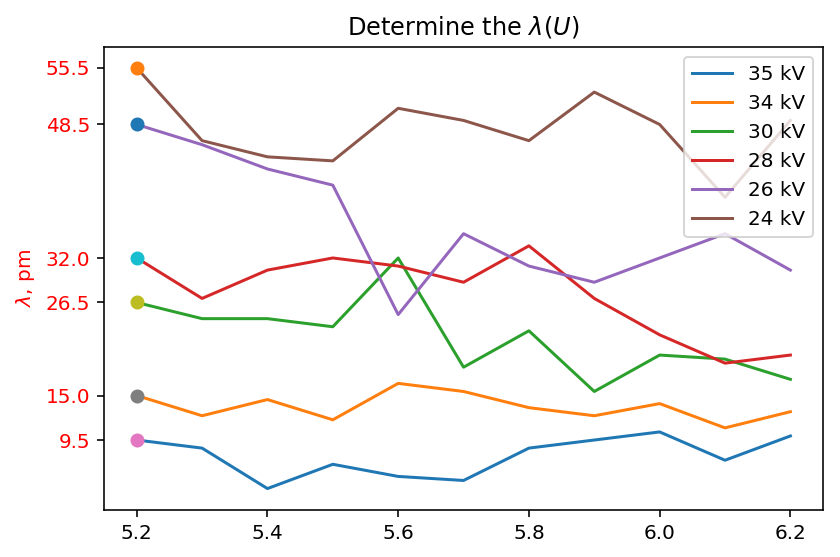

In [188]:
plt.plot(beta, R1)
plt.plot(beta, R2)
plt.plot(beta, R3)
plt.plot(beta, R4)
plt.plot(beta, R5)
plt.plot(beta, R6)
for i in [R1,R2,R3,R4,R5,R6]:
    plt.plot(beta[0], i[0], 'o')
plt.ylabel(r'$\lambda$, pm', color='r')
# plt.xlabel(r'$\beta, ^o$', color='r')
plt.yticks([i[0] for i in [R1,R2,R3,R4,R5,R6]], color='r')
plt.title(r'Determine the $\lambda(U)$')
plt.legend(Vs, loc = 1)
plt.tight_layout()
plt.savefig('a')

In [303]:
Vsa = [35, 34, 30 , 28, 26, 24]

In [314]:
L = [32.6, 33.9, 38.0, 41.1, 43.4, 48.1]

In [315]:
plt.style.use('default')

In [316]:
vv

[0.02857142857142857,
 0.029411764705882353,
 0.03333333333333333,
 0.03571428571428571,
 0.038461538461538464,
 0.041666666666666664]

OPTIMIZED PARAMETERS: cureveN [dw, b, w_0, a] [ 1.14703463e+03 -8.64279813e-02] errer [36.36739874  1.26707638]


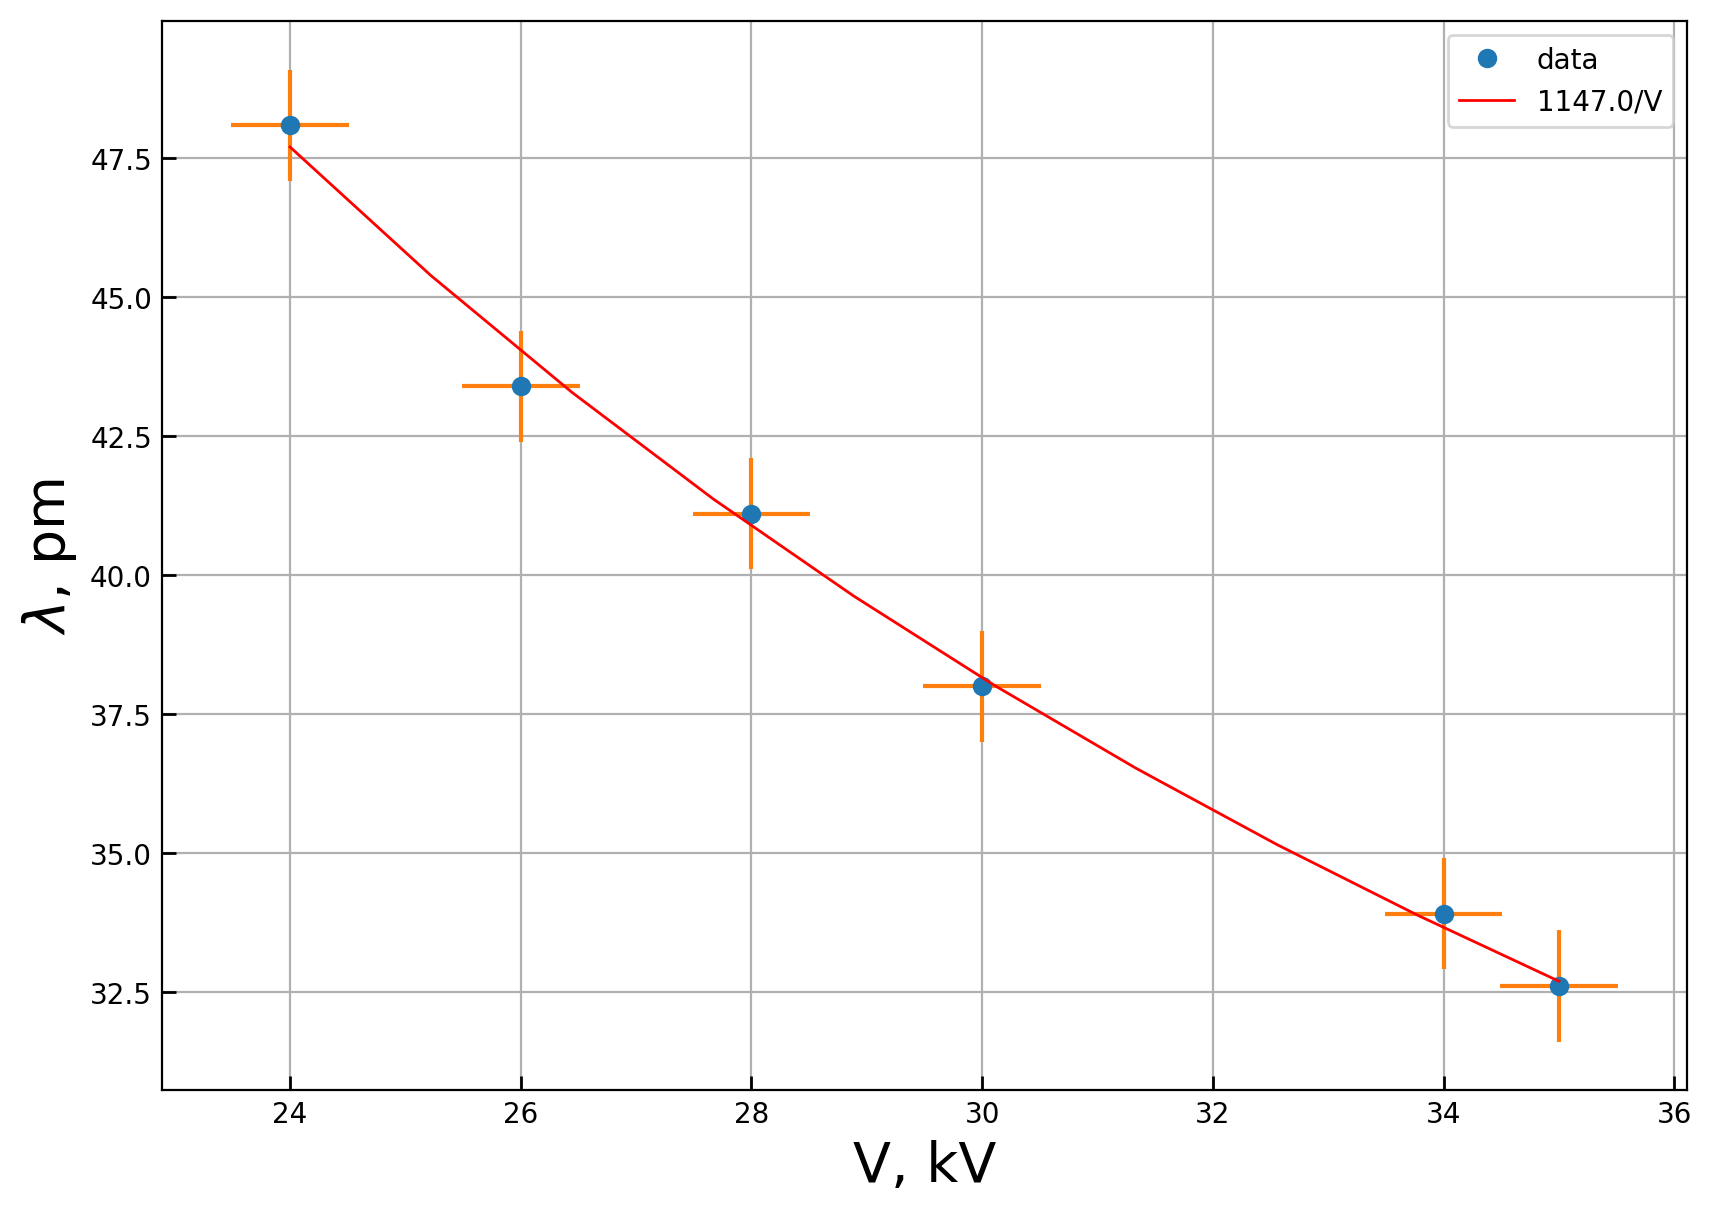

In [333]:
vv = [1/i for i in Vsa]
ax, fig = plotter.simplePlot(Vsa, L, yLabel=r'$\lambda$, pm', 
                             xLabel=r'V, kV', 
                             errorX=0.51,
                             errorY = 1, 
                             symbol='o', figsize=(10,7))
# z = polyfit([0]+vv, [0]+L, 1)


vvf = lambda v, A, C: C + A/v
popt, pcov = curve_fit(vvf, Vsa, L, p0=[10, 1180])
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
print ("OPTIMIZED PARAMETERS: cureveN [dw, b, w_0, a]", popt, 'errer', perr)
x_play = np.linspace(24,35, 10)
fit = vvf(x_play, *popt)
plt.plot(x_play, fit, 'r-', linewidth = 1)




# plt.plot(np.linspace(0.028,0.043, 10), z[1] + z[0]*np.linspace(0.028,0.043, 10), 'r-')
# fig.tick_params('both')
# fig.set_xticks(vv, 'r')
# fig.set_yticks(L, 'r')

plt.legend(['data',f'{round(popt[0])}/V'])
plt.tight_layout()
plt.savefig('Duan', dpi=300)

In [337]:
5.9-6.12

-0.21999999999999975

In [338]:
(1.6*1e-19/(3*1e8))*(1147+36)

6.309333333333334e-25

## Task 4 Both 

In [54]:
beta = '0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.0 2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.0 3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.0'
beta = list(map(lambda x: float(x),a.split(' ')))

AttributeError: 'int' object has no attribute 'split'

In [ ]:
R1 = '222.0 220.5 227.5 184.0 187.0 190.5 182.5 207.0 261.5 300.5 270.0 275.5 245.0 215.0 183.5 191.5 425.0 511.5 485.0 421.0 373.0 306.0 273.5 228.0 192.5 125.0 125.0 110.0 128.5 132.5 126.5 118.0 112.5 108.0 121.5 124.0 113.0 113.5 101.5 115.5 102.0'
R1 = list(map(lambda x: float(x), R1.split(' ')))

In [ ]:
R2 = '56.5 58.5 55.5 52.0 53.0 50.0 44.0 45.0 44.5 47.0 45.5 42.5 45.5 43.5 40.5 67.0 268.5 291.5 274.5 276.0 253.0 209.0 189.0 134.0 120.5 85.0 95.5 98.0 84.5 86.5 86.0 86.0 88.5 83.5 76.0 79.5 75.0 73.0 78.5 70.0 67.0'
R2 = list(map(lambda x: float(x), R2.split(' ')))

In [ ]:
plt.plot(beta, R1)
plt.plot(beta, R2)
plt.title('withFilterAndWithout')

## Task 5 a

In [ ]:
beta = '0.0 10.0 20.0 30.0 40.0 50.0 60.0'

In [ ]:
beta = list(map(lambda x: float(x), beta.split(' ')))

In [ ]:
R1 = '394.96 208.06 135.62 95.37 61.10 51.23 32.81'
R1 = list(map(lambda x: float(x), R1.split(' ')))

In [ ]:
# plt.plot(beta, R1)
# plt.title('withFilter')

In [ ]:
R2 = '1295.92 736.57 492.60 351.57 228.63 197.35 130.94'
R2 = list(map(lambda x: float(x), R2.split(' ')))

In [ ]:
# plt.plot(beta, R2)
# plt.title('withOutFilter')

In [ ]:
plt.plot(beta, R1)
plt.plot(beta, R2)
plt.title('With Filter and without')

## Task 5b

In [ ]:
Z = [0, 6, 13 ,26, 29, 40, 47]

In [ ]:
beta = [0, 10, 20, 30, 40, 50, 60]

N1 = [7403, 7285, 6659, 29.25, 7.75, 62.10, 68.10]

In [ ]:
# plt.plot(beta, N1)
# plt.title('withoutFilter')

In [ ]:
N2 = [3960, 4461, 2801, 8.70, 0.40, 33.85, 13.25]

In [ ]:
# plt.plot(beta, N2)
# plt.title('withFilter')

In [ ]:
plt.plot(beta, N1)
plt.plot(beta, N2)
plt.title('both')